# Simple Linear Regression

Importing Data set

In [39]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("File not found")
print(train)
print(test)

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]
      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]


# Data Preprocessing

Handling Missing Data

In [40]:
# Checking for null values in train data
train.isnull().sum()

x    0
y    1
dtype: int64

In [41]:
# Checking for null values in test data
test.isnull().sum()

x    0
y    0
dtype: int64

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

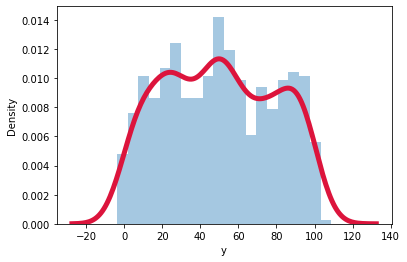

In [42]:
sns.distplot(train['y'], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [43]:
# Fill missing numeric value with mean of that column
train=train.fillna(train.mean(numeric_only=True))
train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


Feature Scaling

In [44]:
# Feature scaling using Standardization
for col in train.columns[:]:
   train[col] = (train[col] - train[col].mean())/train[col].std()
print("Train Data")
print(train)

for col in test.columns[:]:
   test[col] = (test[col] - test[col].mean())/test[col].std()
print("Test data")
print(test)

Train Data
            x         y
0   -0.230068 -0.976005
1   -0.037020 -0.085099
2   -0.296892 -1.124889
3   -0.126119 -0.459065
4    0.237702  1.283987
..        ...       ...
695  0.022379  0.297546
696  0.282251  1.536188
697  0.200577  1.329187
698  0.081778  0.471281
699  0.311951  1.548226

[700 rows x 2 columns]
Test data
            x         y
0    0.914365  0.982754
1   -1.050251 -0.964099
2   -1.015169 -0.880443
3   -1.085334 -1.147092
4   -0.524015 -0.321799
..        ...       ...
295  0.703871  0.596490
296 -0.173190 -0.133126
297  0.142552  0.099258
298  0.388129  0.415944
299 -0.138108  0.043149

[300 rows x 2 columns]


Spliting data

In [45]:
x_train = train.loc[:,:'x']
y_train = train.loc[:,'y':]
x_test = test.loc[:,:'x']
y_test = test.loc[:,'y':]

print("x_train")
print(x_train)
print("\ny_train")
print(y_train)
print("\nx_test")
print(x_test)
print("\ny_test")
print(y_test)

x_train
            x
0   -0.230068
1   -0.037020
2   -0.296892
3   -0.126119
4    0.237702
..        ...
695  0.022379
696  0.282251
697  0.200577
698  0.081778
699  0.311951

[700 rows x 1 columns]

y_train
            y
0   -0.976005
1   -0.085099
2   -1.124889
3   -0.459065
4    1.283987
..        ...
695  0.297546
696  1.536188
697  1.329187
698  0.471281
699  1.548226

[700 rows x 1 columns]

x_test
            x
0    0.914365
1   -1.050251
2   -1.015169
3   -1.085334
4   -0.524015
..        ...
295  0.703871
296 -0.173190
297  0.142552
298  0.388129
299 -0.138108

[300 rows x 1 columns]

y_test
            y
0    0.982754
1   -0.964099
2   -0.880443
3   -1.147092
4   -0.321799
..        ...
295  0.596490
296 -0.133126
297  0.099258
298  0.415944
299  0.043149

[300 rows x 1 columns]


# Applying Formula

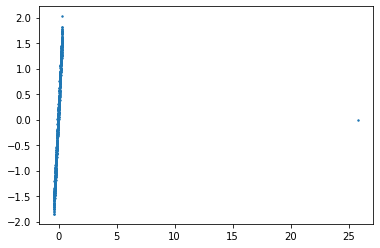

In [46]:
plt.scatter(train['x'],train['y'],s = 2)

In [47]:
n = len(train)
  
# mean of x and y vector
m_x = train['x'].mean()
m_y = train['y'].mean()

print(m_x)
print(m_y)
# calculating cross-deviation and deviation about x
SS_xy = np.sum(train['y']*train['x']) - n*m_y*m_x
SS_xx = np.sum(train['x']*train['x']) - n*m_x*m_x


# calculating regression coefficients
slope = SS_xy / SS_xx
intercept = m_y - slope*m_x

print(slope)
print(intercept)


-5.329070518200751e-17
-2.5376526277146434e-16
0.21383013727117847
-2.4237010396711776e-16


# Gradient Decent

In [48]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(train['x'])) # Number of elements in X
X = train['x']
Y = train['y']
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.03871429382062577 -4.6019569107816735e-17


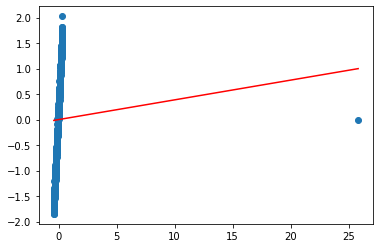

In [49]:
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
X = np.array(train['x']).reshape(700,1)
Y = np.array(train['y']).reshape(700,1)

reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y))

print(reg.coef_)

print(reg.intercept_)


# y_pred=reg.predict(x_test)
# import sklearn.metrics as sm
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# round(metrics.r2_score(y_test, y_pred),2)

0.04572332760541109
[[0.21383014]]
[-2.42370104e-16]
